In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

In [2]:
plt.style.use('classic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

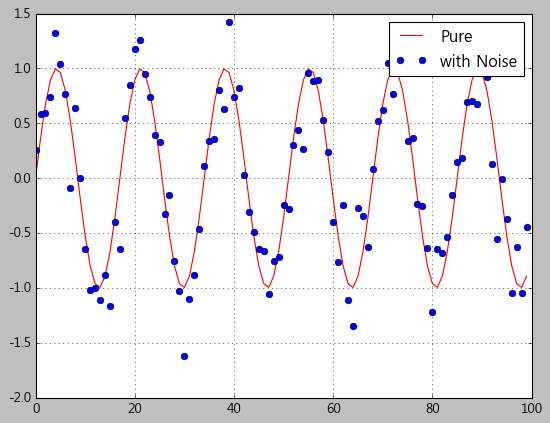

In [3]:
# 시각화 (1)
np.random.seed(20200503)
ts = np.sin(2*np.pi/17*np.arange(0,100))
ts_noise = ts+np.random.normal(scale=0.25, size=100)
plt.plot(ts, 'r-', label='Pure')
plt.plot(ts_noise, 'o', label='with Noise')
plt.legend()
plt.grid()
plt.show()

In [4]:
# 훈련 및 검증 데이터 생성
n = 3
X_train_stack = []
for i in range(n):
    X_train_stack.append(ts_noise[i:i-n])
X_train = np.c_[X_train_stack].T
X_train = X_train[:,:,np.newaxis]
y_train = ts_noise[n:]

m = int(len(y_train)*0.75)
(X_train, y_train), (X_test, y_test) = (X_train[:m], y_train[:m]), (X_train[m:], y_train[m:])

In [5]:
# 모델 생성 (RNN)
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3,1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')

In [6]:
# 모델 훈련
cp_callback = tf.keras.callbacks.ModelCheckpoint('cpts/rnn_20200504', save_weights_only=True, verbose=0)
result = model.fit(X_train, y_train, epochs=300, verbose=0, callbacks=[cp_callback], validation_data=(X_test, y_test))

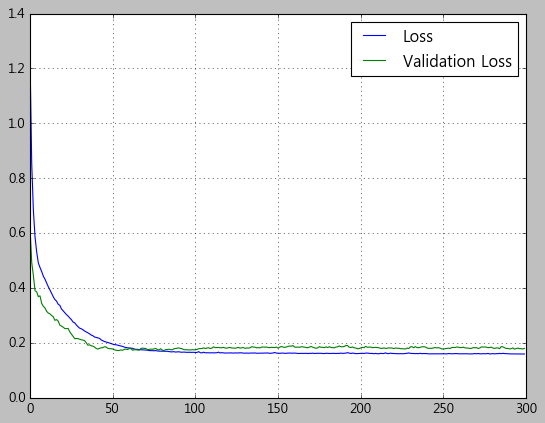

In [7]:
# 시각화 (2)
plt.plot(result.history['loss'], label='Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid()
plt.show()

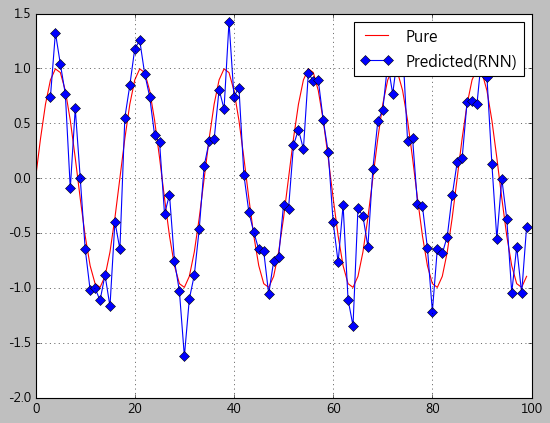

In [18]:
# 시각화 (3)
y_pred = model.predict(np.r_[X_train, X_test])
y_actual = np.r_[y_train, y_test]
plt.plot(ts, 'r-', label='Pure')
plt.plot(np.arange(3, len(ts)), y_actual, '-D', label='Predicted(RNN)')
# plt.plot(np.arange(3, len(ts)), y_pred, '-s', label='Actual')
plt.legend()
plt.grid()
plt.show()

In [13]:
# 모델 생성 (RNN)
model = Sequential()
model.add(LSTM(10, input_shape=(3,1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

In [14]:
# 모델 훈련
cp_callback = tf.keras.callbacks.ModelCheckpoint('cpts/lstm_20200504', save_weights_only=True, verbose=0)
result = model.fit(X_train, y_train, epochs=500, verbose=0, callbacks=[cp_callback], validation_data=(X_test, y_test))

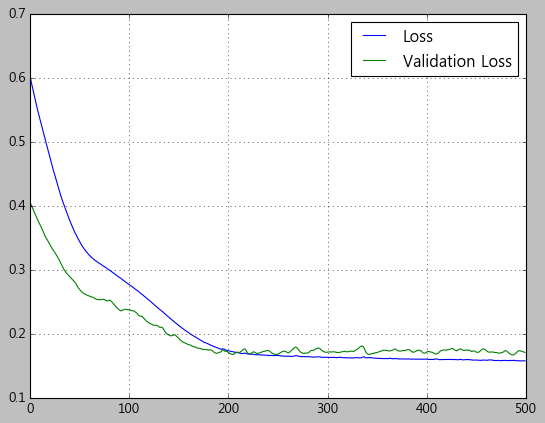

In [15]:
# 시각화 (4)
plt.plot(result.history['loss'], label='Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid()
plt.show()

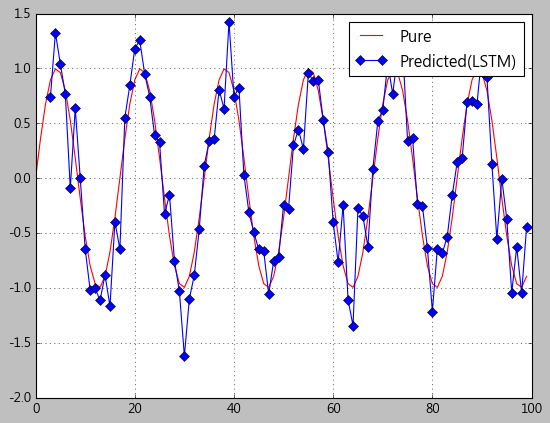

In [20]:
# 시각화 (5)
y_pred = model.predict(np.r_[X_train, X_test])
y_actual = np.r_[y_train, y_test]
plt.plot(ts, 'r-', label='Pure')
plt.plot(np.arange(3, len(ts)), y_actual, '-D', label='Predicted(LSTM)')
# plt.plot(np.arange(3, len(ts)), y_pred, '-s', label='Actual')
plt.legend()
plt.grid()
plt.show()